# Employee Departure Prediction using Machine Learning Algorithms

### Project Objective: 

This project focuses on developing accurate machine learning models for predicting employee departure or churn at Awesome Tech Solutions. The dataset provided contains essential employee information such as gender, distance from work, years of experience, and salary details. Notably, the dataset lacks target labels indicating employee churn status.

Given the absence of target labels in the dataset, the project aims to leverage unsupervised learning techniques, such as clustering, to identify patterns and potential indicators of employee churn. Additionally, we will explore feature engineering and domain knowledge to create informative features for the predictive models.

### Target: 
Predict whether employee will leave or not

### Data Description:

1. Gender: Male/Female
2. Distance: Distance from the premisis.
3. YearsWorked: Number of years with the organisation.
4. HireDate: Date on which employee joined
5. Previous Salary: salary earlier
6. Salary: Current salary.
7. Department Code: Department the employee belongs

### Our Approach:
* Understand the Data
* Perform EDA
* Handle Missing Values/Duplicate values
* Feature Engineering
* Creating pipelines
* Clustering
* Try different Machine learning Algorithms
* Pick the Best performing Model
* Improve the model by Hyper parameter Tuning
* Evaluate the results

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cluster import DBSCAN, KMeans

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd

class SME():

    def __init__(self):
        self.asked = 0
        self.df = self.get()

    def get(self):
        X_train = pd.read_csv('X_train.csv')
        y_train = pd.read_csv('y_train.csv')

        X_train['Left'] = y_train
        return X_train, X_train['Left'].value_counts()

    def ask(self, gender, distance, years_worked, hire_date, prev_salary, current_salary, dep_code):
        self.asked += 1
        #  print(self.asked)

        if self.asked > 500:
            raise Exception("Sorry, you have asked enough")

        result = self.df.query(f"Gender=={gender} and Distance=='{distance}' and YearsWorked == {years_worked} and HireDate == '{hire_date}' and PreviousSalary == '{prev_salary}' and Salary == '{current_salary}' and DepartmentCode == {dep_code}")

        return result['Left'][0]

In [9]:
sme = SME()

In [10]:
sme.get()

(      Gender  Distance  YearsWorked    HireDate PreviousSalary Salary  \
 0          0  ~20miles            8  2007-09-05            63K    66K   
 1          0  >30miles            7  2011-10-16            60K    63K   
 2          0  ~15miles            7  2011-05-18            59K    60K   
 3          1    <5mile            3  2000-06-30            60K    61K   
 4          1  ~10miles            9  2010-04-28            56K    57K   
 ...      ...       ...          ...         ...            ...    ...   
 7495       0  >30miles            5  2014-03-15            60K    62K   
 7496       0  ~10miles            7  2011-07-10            64K    68K   
 7497       0  ~10miles            8  2006-08-19            56K    57K   
 7498       0  ~20miles            6  2016-09-18            60K    62K   
 7499       0  ~20miles            5  2013-12-26            57K    58K   
 
       DepartmentCode  Left  
 0                  3     1  
 1                  3     1  
 2                  

In [11]:
X_train = pd.read_csv('X_train.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# **Exploratory Data Analysis**

In [12]:
X_train.head()

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
0,0,~20miles,8,2007-09-05,63K,66K,3
1,0,>30miles,7,2011-10-16,60K,63K,3
2,0,~15miles,7,2011-05-18,59K,60K,3
3,1,<5mile,3,2000-06-30,60K,61K,2
4,1,~10miles,9,2010-04-28,56K,57K,7


In [13]:
X_train.dtypes

Gender             int64
Distance          object
YearsWorked        int64
HireDate          object
PreviousSalary    object
Salary            object
DepartmentCode     int64
dtype: object

In [14]:
X_train.isnull().sum()

Gender             0
Distance          10
YearsWorked        0
HireDate           0
PreviousSalary     0
Salary             0
DepartmentCode     0
dtype: int64

In [15]:
X_train.nunique()

Gender               2
Distance             5
YearsWorked         14
HireDate          4458
PreviousSalary      22
Salary              25
DepartmentCode       6
dtype: int64

In [16]:
X_train.describe()

,Gender,YearsWorked,DepartmentCode
count,7500.000000,7500.000000,7500.00000
mean,0.404133,7.013067,3.99360
std,0.490756,1.865840,2.15822
min,0.000000,1.000000,1.00000
25%,0.000000,6.000000,2.00000
50%,0.000000,7.000000,3.00000
75%,1.000000,8.000000,6.00000
max,1.000000,14.000000,7.00000


In [17]:
#convert the salary columns into a useful format
X_train['PreviousSalary'] = X_train['PreviousSalary'].astype(str).str.replace('K', '').astype(float) * 1000
X_train['Salary'] = X_train['Salary'].astype(str).str.replace('K', '').astype(float) * 1000
X_test['PreviousSalary'] = X_test['PreviousSalary'].astype(str).str.replace('K', '').astype(float) * 1000
X_test['Salary'] = X_test['Salary'].astype(str).str.replace('K', '').astype(float) * 1000

### Feature Engineering

In [18]:
X_train['Salary_Change_Percentage'] = ((X_train['Salary'] - X_train['PreviousSalary']) / X_train['PreviousSalary']) * 100
X_test['Salary_Change_Percentage'] = ((X_test['Salary'] - X_test['PreviousSalary']) / X_test['PreviousSalary']) * 100

Adding New column named Salary change percentage using salary and previous salary

In [19]:
X_train.dtypes

Gender                        int64
Distance                     object
YearsWorked                   int64
HireDate                     object
PreviousSalary              float64
Salary                      float64
DepartmentCode                int64
Salary_Change_Percentage    float64
dtype: object

In [20]:
X_train=X_train.drop('HireDate',axis=1)
X_test=X_test.drop('HireDate',axis=1)

In [21]:
X_train

,Gender,Distance,YearsWorked,PreviousSalary,Salary,DepartmentCode,Salary_Change_Percentage
0,0,~20miles,8,63000.0,66000.0,3,4.761905
1,0,>30miles,7,60000.0,63000.0,3,5.000000
2,0,~15miles,7,59000.0,60000.0,3,1.694915
3,1,<5mile,3,60000.0,61000.0,2,1.666667
4,1,~10miles,9,56000.0,57000.0,7,1.785714
...,...,...,...,...,...,...,...
7495,0,>30miles,5,60000.0,62000.0,6,3.333333
7496,0,~10miles,7,64000.0,68000.0,3,6.250000
7497,0,~10miles,8,56000.0,57000.0,2,1.785714
7498,0,~20miles,6,60000.0,62000.0,5,3.333333


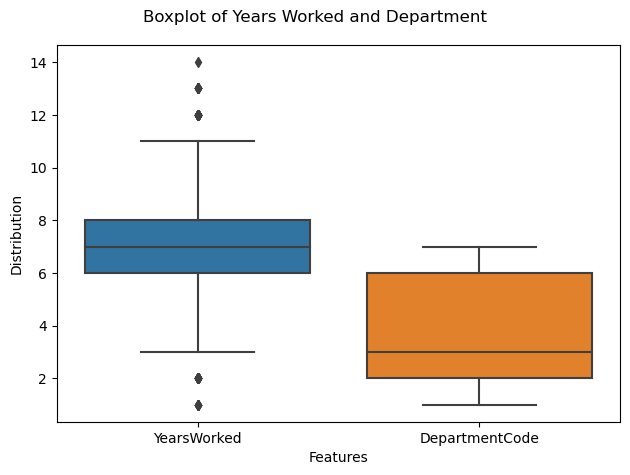

In [22]:
sns.boxplot(data=X_train[[ 'YearsWorked', 'DepartmentCode']])
plt.xlabel('Features')
plt.ylabel('Distribution')
plt.suptitle('Boxplot of Years Worked and Department')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

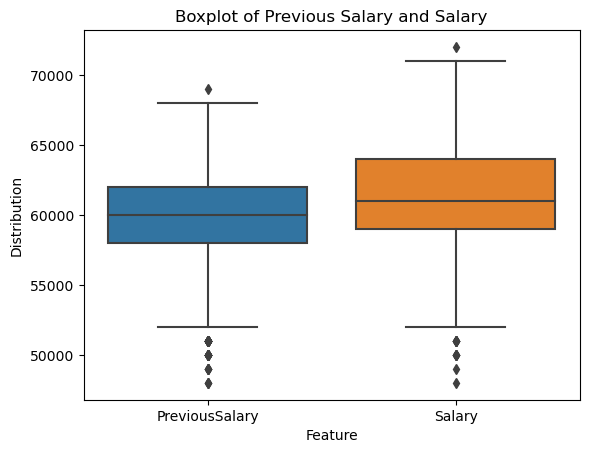

In [23]:
# Create boxplot
sns.boxplot(data=X_train[['PreviousSalary', 'Salary']])

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Distribution')
plt.title('Boxplot of Previous Salary and Salary')

# Show plot
plt.show()

### Pipeline

In [5]:
# create processing pipeline
num=['YearsWorked','PreviousSalary','Salary']
cat=['Gender','Distance','DepartmentCode']
#num pipeline
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),('standardize_num', StandardScaler())])
#cat pipeline
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('num pipeline', num_pipeline, num),
                                                      ('cat pipeline', cat_pipeline, cat)])
processing_pipeline

ColumnTransformer(transformers=[('num pipeline',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['YearsWorked', 'PreviousSalary', 'Salary']),
                                ('cat pipeline',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Gender', 'Distance', 'DepartmentCode'])])

**Data Cleaning Explanation:**

1. Removed HireDate Column as it adds no value
2. Identified Null values and those have been replaced using Simple Impute
3. converted the salary columns into a useful format Ex:- changed 60k value to 60000

### Elbow Plot

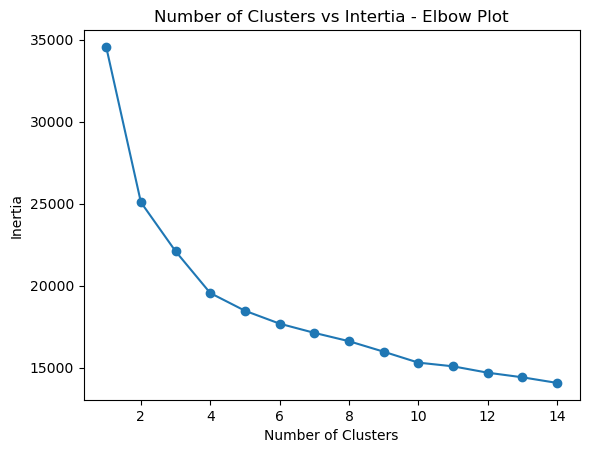

In [58]:
X_train_trans=processing_pipeline.fit_transform(X_train)

distortions = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X_train_trans)
    distortions.append(km.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.title('Number of Clusters vs Intertia - Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### K means

Text(0.5, 1.0, 'Clustering Visualisation')

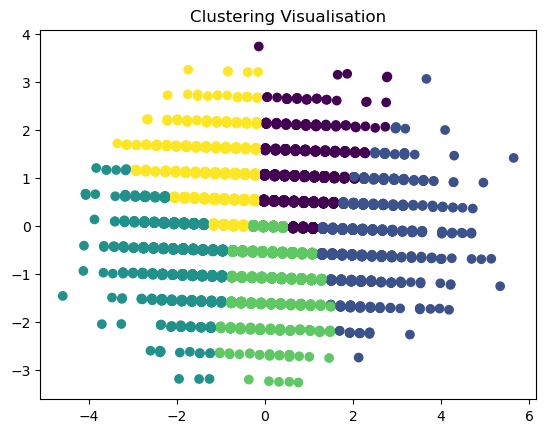

In [21]:
k=5

kmeans=KMeans(n_clusters=k)
km=kmeans.fit(X_train_trans)
pca=PCA(n_components=2)
pca_val=pca.fit_transform(X_train_trans)
plt.scatter(pca_val[:,0],pca_val[:,1],c=km.labels_)
plt.title('Clustering Visualisation with K Means')

### Clustering Using K means

In [23]:
ph = Pipeline([('sc', StandardScaler()),
             ('kmeans', KMeans(n_clusters=5, n_init='auto'))])
#divided data in optimal number of clusters
ph.fit(X_train_trans)

X_train['cluster'] = ph.predict(X_train_trans)

In [24]:
X_train.head(10)

,Gender,Distance,YearsWorked,PreviousSalary,Salary,DepartmentCode,Salary_Change_Percentage,cluster
0,0,~20miles,8,63000.0,66000.0,3,4.761905,1
1,0,>30miles,7,60000.0,63000.0,3,5.000000,0
2,0,~15miles,7,59000.0,60000.0,3,1.694915,1
3,1,<5mile,3,60000.0,61000.0,2,1.666667,2
4,1,~10miles,9,56000.0,57000.0,7,1.785714,3
5,1,~15miles,10,60000.0,62000.0,1,3.333333,2
6,0,~15miles,6,62000.0,64000.0,2,3.225806,2
7,0,~15miles,9,63000.0,64000.0,2,1.587302,2
8,1,~20miles,7,59000.0,60000.0,6,1.694915,4
9,0,~20miles,3,62000.0,65000.0,7,4.838710,3


In [25]:
ph['kmeans'].cluster_centers_

array([[ 1.12368376e-02, -6.01171812e-02, -3.35855575e-02,
         4.33224322e-02,  2.96930193e+00, -6.56940568e-01,
        -6.46143496e-01, -5.07073664e-01,  9.28354034e-02,
         3.16155539e-02, -5.98349115e-02, -2.97985464e-02,
        -2.61199962e-04],
       [ 1.16589426e-02,  1.75466694e-02,  1.22484487e-02,
         5.20028750e-03, -3.36779494e-01,  5.02439158e-01,
        -2.50976604e-01, -2.12427206e-01, -4.43774542e-01,
         9.56039976e-01,  1.82404636e-01, -4.60459847e-01,
        -4.40326353e-01],
       [ 5.92265440e-03,  9.76207206e-03,  5.72389652e-03,
        -1.43660654e-02, -3.36779494e-01, -2.32843847e-01,
         6.58071071e-01, -1.58070522e-01,  1.19298321e+00,
        -4.54706327e-01,  1.11728142e-01, -4.60459847e-01,
        -4.40326353e-01],
       [-5.64868531e-02,  1.68872296e-02,  1.21640542e-02,
         1.09492716e-02, -3.36779494e-01,  5.81547084e-02,
         8.97979587e-02,  5.26666539e-02, -4.43774542e-01,
        -4.54706327e-01, -4.35352865e

In [26]:
X_dist = ph.transform(X_train_trans)
X_dist

array([[5.2190672 , 3.53211018, 4.55263833, 4.84713221, 4.1580867 ],
       [2.57086045, 3.92507889, 4.88803459, 5.25975807, 4.92600777],
       [4.7070877 , 2.7378011 , 3.46070009, 4.27300858, 3.97404446],
       ...,
       [5.00294775, 3.88435414, 3.22856428, 4.6761426 , 4.36445907],
       [4.96981426, 3.71301292, 3.85896079, 4.53272042, 3.49267213],
       [5.15835567, 4.43542932, 4.51157235, 2.87726824, 4.09025589]])

In [27]:
representative_idx = np.argmin(X_dist, axis=0)
representative_idx

array([1255, 6104, 3526, 1314, 2193], dtype=int64)

In [28]:
X_train['left'] = None

cluster=0
for idx in representative_idx:
#     print(idx)
    print(X_train[idx:idx+1])
    left = input()
    X_train['left'] = [ left if c == cluster else g  for c, g in zip(X_train['cluster'], X_train['left'])]
    cluster+=1
    print('----------------------')

X_train

      Gender  Distance  YearsWorked  PreviousSalary   Salary  DepartmentCode  \
1255       0  >30miles            7         59000.0  61000.0               1   

      Salary_Change_Percentage  cluster  left  
1255                  3.389831        0  None  
1
----------------------
      Gender  Distance  YearsWorked  PreviousSalary   Salary  DepartmentCode  \
6104       0  ~10miles            7         60000.0  61000.0               3   

      Salary_Change_Percentage  cluster  left  
6104                  1.666667        1  None  
0
----------------------
      Gender  Distance  YearsWorked  PreviousSalary   Salary  DepartmentCode  \
3526       0  ~15miles            7         60000.0  61000.0               2   

      Salary_Change_Percentage  cluster  left  
3526                  1.666667        2  None  
0
----------------------
      Gender Distance  YearsWorked  PreviousSalary   Salary  DepartmentCode  \
1314       0   <5mile            7         59000.0  61000.0               7

,Gender,Distance,YearsWorked,PreviousSalary,Salary,DepartmentCode,Salary_Change_Percentage,cluster,left
0,0,~20miles,8,63000.0,66000.0,3,4.761905,1,0
1,0,>30miles,7,60000.0,63000.0,3,5.000000,0,1
2,0,~15miles,7,59000.0,60000.0,3,1.694915,1,0
3,1,<5mile,3,60000.0,61000.0,2,1.666667,2,0
4,1,~10miles,9,56000.0,57000.0,7,1.785714,3,0
...,...,...,...,...,...,...,...,...,...
7495,0,>30miles,5,60000.0,62000.0,6,3.333333,0,1
7496,0,~10miles,7,64000.0,68000.0,3,6.250000,1,0
7497,0,~10miles,8,56000.0,57000.0,2,1.785714,2,0
7498,0,~20miles,6,60000.0,62000.0,5,3.333333,4,0


**Our Approach** 
Since we dont have target variable
1. we started with elbow plot to check optimal number of clusters
2. then divided the data in to optimal number of clusters using k means 
3. calculated the centroid of each cluster
4. later labelled each centroid after checking with the expert
5. finally generated the target value for entire dataset

In [33]:
X_train['left'].value_counts()

0    6736
1     764
Name: left, dtype: int64

In [34]:
employee_left = X_train['left'].value_counts()
total = employee_left.sum()
per_employee_left = (employee_left / total) * 100

In [35]:
print("The percentage of the employees who stayed vs left:\n ", per_employee_left)

The percentage of the employees who stayed vs left:
  0    89.813333
1    10.186667
Name: left, dtype: float64


* The count of employees who does not left the company (0) has 6227 values and the employees who lef the job (1) was 1273.
* By looking at the target variable counts we can clearly say that the data is imbalanced.

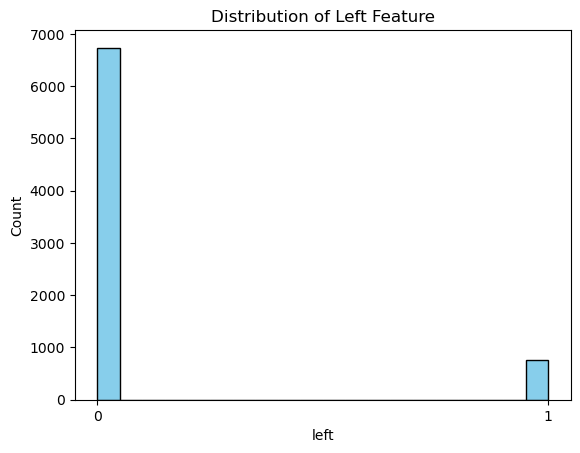

In [60]:
# Plot histogram
plt.hist(X_train['left'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('left')
plt.ylabel('Count')
plt.title('Distribution of Left Feature')

# Show plot
plt.show()

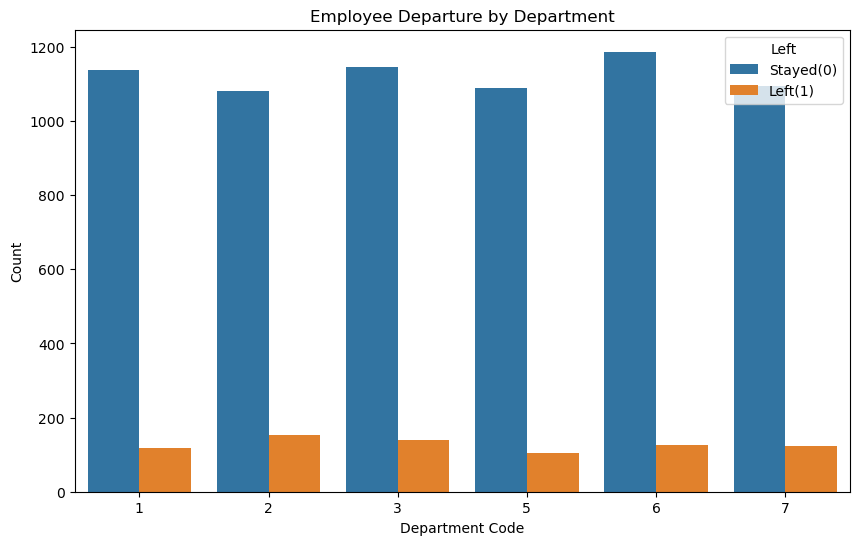

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data= X_train, x= 'DepartmentCode', hue= 'left')
plt.title('Employee Departure by Department')
plt.xlabel('Department Code')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed(0)', 'Left(1)'])
plt.show()

By observing the above graph we can obsever theres a impbalce between both the 1's and 0's

In [38]:
X_train.head()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,DepartmentCode,Salary_Change_Percentage,cluster,left
0,0,~20miles,8,63000.0,66000.0,3,4.761905,1,0
1,0,>30miles,7,60000.0,63000.0,3,5.000000,0,1
2,0,~15miles,7,59000.0,60000.0,3,1.694915,1,0
3,1,<5mile,3,60000.0,61000.0,2,1.666667,2,0
4,1,~10miles,9,56000.0,57000.0,7,1.785714,3,0


# **Modelling**

In [39]:
dX_train = X_train.drop('left', axis =1)
dy_train = X_train['left']

In [40]:
# logistic Regression

pipeline = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('pca', PCA()),  # Set the desired explained variance
    ('lr_model', LogisticRegression(random_state=42))
])

param_grid = {'pca__n_components': [2,5,8], 'lr_model__C': [0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring  = 'f1', refit=True)
grid_search.fit(dX_train, dy_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing_pipeline',
                                        ColumnTransformer(transformers=[('num '
                                                                         'pipeline',
                                                                         Pipeline(steps=[('impute_missing',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize_num',
                                                                                          StandardScaler())]),
                                                                         ['YearsWorked',
                                                                          'PreviousSalary',
                                                                          'Salary']),
                                                                        ('cat '
                                                                         'pipeline',
                                                                         Pipeline(steps=[('impute_missing_cats',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('create_dummies_cats',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Distance',
                                                                          'DepartmentCode'])])),
                                       ('pca', PCA()),
                                       ('lr_model',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr_model__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [2, 5, 8]},
             scoring='f1')

In [41]:
# Evaluate the model
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['YearsWorked',
                                                   'PreviousSalary',
                                                   'Salary']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Distance',
                                                   'DepartmentCode'])])),
                ('pca', PCA(n_components=2)),
                ('lr_model', LogisticRegression(C=0.01, random_state=42))])

In [42]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [43]:
f1 = f1_score(y_test, y_pred.astype(int), average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred.astype(int))
class_report = classification_report(y_test, y_pred.astype(int))

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print("\nTest Set Results:")
print(f"f1-score: {f1}")

Best Parameters: {'lr_model__C': 0.01, 'pca__n_components': 2}

Test Set Results:
f1-score: 0.6278185415228894


The logistic regression model achieved an F1 score of approximately 0.628 on the test set using regularization strength (C) of 0.01 and 2 principal components after PCA. These parameters were selected through grid search optimization.

In [44]:
# Decision Tree Classifier

pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('pca', PCA()),  # Set the desired explained variance
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid = [{
   'pca__n_components': [2, 5, 8],
   'classifier__max_depth': [2, 5, 10, 15, 20],
   'classifier__min_samples_split':[3, 5, 10, 20, 40],
   'classifier__min_samples_leaf': [2, 5],
   'classifier__class_weight':[None, 'balanced']
  }
 ]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring  = 'f1', refit=True)
grid_search.fit(dX_train, dy_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_processing',
                                        ColumnTransformer(transformers=[('num '
                                                                         'pipeline',
                                                                         Pipeline(steps=[('impute_missing',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize_num',
                                                                                          StandardScaler())]),
                                                                         ['YearsWorked',
                                                                          'PreviousSalary',
                                                                          'Salary']),
                                                                        ('cat '
                                                                         'pipeline',
                                                                         Pipeline(steps=[('impute_missing_cats',
                                                                                          SimpleImputer(strategy='most_fre...
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Distance',
                                                                          'DepartmentCode'])])),
                                       ('pca', PCA()),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid=[{'classifier__class_weight': [None, 'balanced'],
                          'classifier__max_depth': [2, 5, 10, 15, 20],
                          'classifier__min_samples_leaf': [2, 5],
                          'classifier__min_samples_split': [3, 5, 10, 20, 40],
                          'pca__n_components': [2, 5, 8]}],
             scoring='f1')

In [45]:
# Evaluate the model
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['YearsWorked',
                                                   'PreviousSalary',
                                                   'Salary']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Distance',
                                                   'DepartmentCode'])])),
                ('pca', PCA(n_components=2)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=2,
                                        min_samples_split=3,
                                        random_state=42))])

In [46]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [47]:
f1 = f1_score(y_test, y_pred.astype(int), average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred.astype(int))
class_report = classification_report(y_test, y_pred.astype(int))

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print("\nTest Set Results:")
print(f"f1-score: {f1}")

Best Parameters: {'classifier__class_weight': None, 'classifier__max_depth': 2, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 3, 'pca__n_components': 2}

Test Set Results:
f1-score: 0.6278185415228894


The best parameters obtained for the decision tree classifier are:

- Max depth: 2
- Min samples leaf: 2
- Min samples split: 3
- Class weight: None
- Number of principal components after PCA: 2

On the test set, the decision tree classifier achieved an F1 score of approximately 0.628. These parameters were determined through grid search optimization, which systematically explores various combinations to maximize the performance metric.

In [48]:
# Random Forest Classifier

pipeline = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('pca', PCA()),  # Set the desired explained variance
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = [{
               'pca__n_components': [2, 5, 8],
               'classifier__max_depth': [5, 8, 10, 12],
               'classifier__n_estimators': [10, 50, 100],
               'classifier__class_weight': [None, 'balanced', 'balanced_subsample'],
               'classifier__max_samples': [1000, 2000, 5000]
              }]

# Apply GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring  = 'f1', refit=True)
grid_search.fit(dX_train, dy_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing_pipeline',
                                        ColumnTransformer(transformers=[('num '
                                                                         'pipeline',
                                                                         Pipeline(steps=[('impute_missing',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize_num',
                                                                                          StandardScaler())]),
                                                                         ['YearsWorked',
                                                                          'PreviousSalary',
                                                                          'Salary']),
                                                                        ('cat '
                                                                         'pipeline',
                                                                         Pipeline(steps=[('impute_missing_cats',
                                                                                          SimpleImputer(strategy='most...
                                                                         ['Gender',
                                                                          'Distance',
                                                                          'DepartmentCode'])])),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'classifier__class_weight': [None, 'balanced',
                                                       'balanced_subsample'],
                          'classifier__max_depth': [5, 8, 10, 12],
                          'classifier__max_samples': [1000, 2000, 5000],
                          'classifier__n_estimators': [10, 50, 100],
                          'pca__n_components': [2, 5, 8]}],
             scoring='f1')

In [49]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [50]:
best_model

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['YearsWorked',
                                                   'PreviousSalary',
                                                   'Salary']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Distance',
                                                   'DepartmentCode'])])),
                ('pca', PCA(n_components=2)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, max_samples=1000,
                                        n_estimators=10, random_state=42))])

In [51]:
# Evaluate the model
f1_value = f1_score(y_test, y_pred.astype(int), average='weighted')

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print("\nTest Set Results:")
print(f"f1-score: {f1_value}")

Best Parameters: {'classifier__class_weight': None, 'classifier__max_depth': 5, 'classifier__max_samples': 1000, 'classifier__n_estimators': 10, 'pca__n_components': 2}

Test Set Results:
f1-score: 0.6278185415228894


The best parameters obtained for the Random Forest Classifier are as follows:

- Max depth: 5
- Max samples: 1000
- Number of estimators: 10
- Class weight: None
- Number of principal components after PCA: 2

On the test set, the Random Forest Classifier achieved an F1 score of approximately 0.628. These parameters were determined through grid search optimization, which systematically explores various combinations to maximize the performance metric.

### Conclusion

From the F1 scores obtained for different classifiers:

**Logistic Regression**: 0.6278

**Decision Tree Classifier**: 0.6278

**Random Forest Classifier**: 0.6276

Since F1 score considers both precision and recall, it's suitable for imbalanced datasets where the distribution of classes is uneven. In our case, all classifiers have achieved F1 scores ranging from approximately 0.6276 to 0.6278, indicating a reasonable balance between precision and recall.

### Future Scope:
1. **Outlier Elimination**: Identify and remove outliers using robust statistical methods like Z-score or IQR to enhance model stability and performance.

2. **Explore Clustering Techniques**: Experiment with hierarchical clustering and Gaussian mixture models (GMM) to capture complex data structures and density variations for more accurate employee churn prediction. 

3. **Feature Engineering**: Generate new features through polynomial transformations or domain-specific insights to enrich the dataset and improve the model's ability to capture relevant patterns.